In [12]:
import pandas as pd
import matplotlib as mp
import statsmodels.api as sm
import calendar as cd
%matplotlib inline

In [3]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

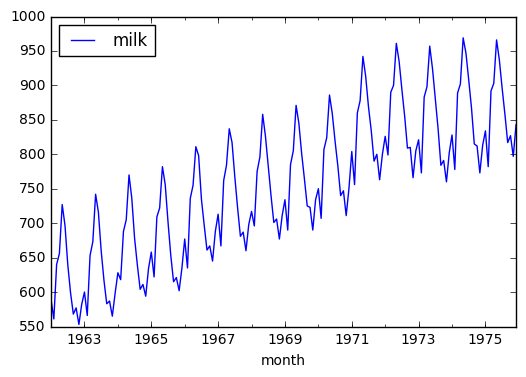

In [6]:
milk.plot()

Критерий Дики-Фулера для гипотезы о стационарности

In [10]:
sm.tsa.stattools.adfuller(milk['milk'])

(-1.303811587422131,
 0.62742670860303096,
 13L,
 154L,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

Попытка получить ряд более плавным, например, представить ряд средним по дню, а не месяцу

In [25]:
milk_avg_by_date = milk['milk']/map(float,milk.index.days_in_month)

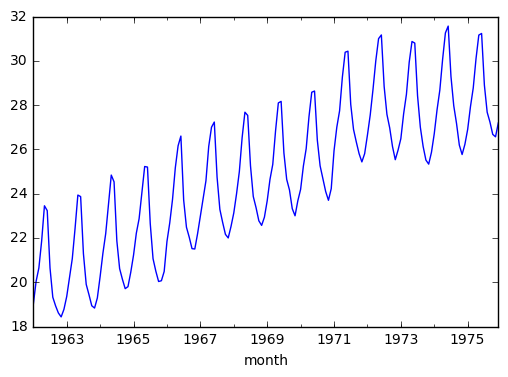

In [26]:
milk_avg_by_date.plot()

Попытка сделать ряд стационарным с помощью дифференцирования

In [40]:
#обычное дифференцирование
milk_diff1 = milk_avg_by_date - milk_avg_by_date.shift(1)
milk_diff1.dropna(inplace=True)
print 'p-value: ', sm.tsa.stattools.adfuller(milk_diff1)[1]

# Сезонное дифференцирование
milk_diff12 = milk_avg_by_date - milk_avg_by_date.shift(12)
milk_diff12.dropna(inplace=True)
print 'p-value: ', sm.tsa.stattools.adfuller(milk_diff12)[1]

# и сезонное, и обычное дифференцирование
milk_diff13 = milk_diff12-milk_diff12.shift(1)
milk_diff13.dropna(inplace=True)
print 'p-value: ', sm.tsa.stattools.adfuller(milk_diff13)[1]


p-value:  0.0643005465417
p-value:  0.221276726588
p-value:  2.2808455518e-06


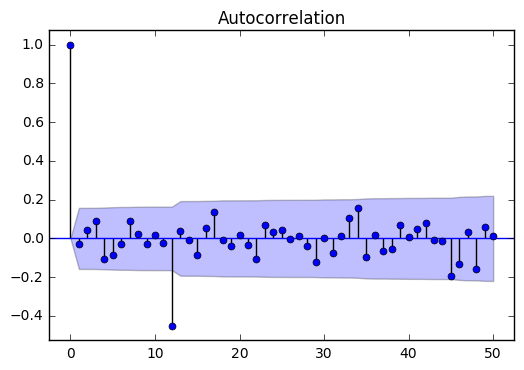

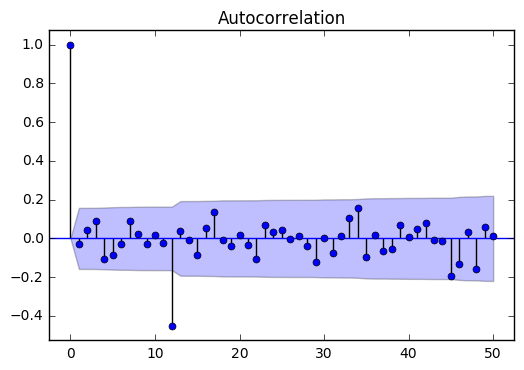

In [41]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk_diff13.values.squeeze(), lags=50)

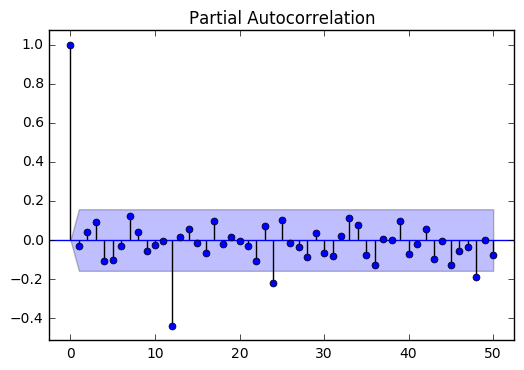

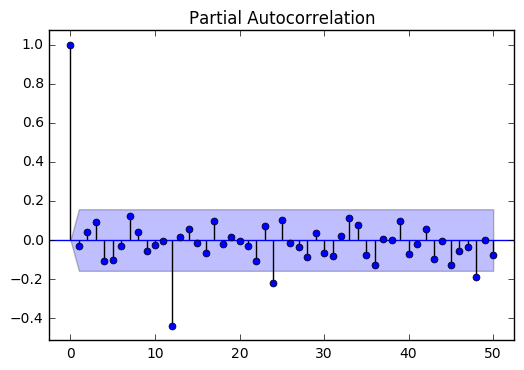

In [42]:
sm.graphics.tsa.plot_pacf(milk_diff13.values.squeeze(), lags=50)